<a href="https://colab.research.google.com/github/RMartinod/Computer-Graphics-Using-Python/blob/main/Chapter05_Rotation_in_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rotation of the Local Coordinate (LC1) with turning of 30deg., obtaining the Local Coordinate (LC2).**

In [1]:
import numpy as np, plotly.express as px
pi = [4,0,1]
theta = 30*np.pi/180
LC1 = np.array([[1, 0, pi[0]],
                [0, 1, pi[1]],
                [0, 0, pi[2]]])
RM = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0, 0, 1]])
LC2 = np.matmul(RM,LC1)
fig = px.line(x=[LC1[0,0]+LC1[0,2], LC1[0,2], LC1[0,1]+LC1[0,2]],
              y=[LC1[1,0]+LC1[1,2], LC1[1,2], LC1[1,1]+LC1[1,2]])
fig.add_trace(px.line(x=[LC2[0,0]+LC2[0,2], LC2[0,2], LC2[0,1]+LC2[0,2]],
                      y=[LC2[1,0]+LC2[1,2], LC2[1,2], LC2[1,1]+LC2[1,2]]).data[0])
fig.update_traces(line_color='red',line_width=4)
fig.show()

**Rotation of the curve (C1) by turning 120deg, obtaining the curve (C2).**

In [ ]:
import numpy as np, plotly.express as px
u = np.linspace(0,2*np.pi,500)
r = np.exp(np.cos(u))-2*np.cos(4*u)+(np.sin(u/12))**5;
x = r*np.sin(u) + 4
y = r*np.cos(u)
C1 = np.array([x,y,np.ones(len(x))])
theta = 120*np.pi/180
RM = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0, 0, 1]])
C2 = np.matmul(RM,C1)
fig = px.line(x=C1[0,:],y=C1[1,:])
fig.add_trace(px.line(x=C2[0,:],y=C2[1,:]).data[0])
fig.update_traces(line_color='black',line_width=4)
fig.update_layout(title='Butterfly',autosize=False)

**Rotation of the surface (S1) by turning -120deg, obtaining the surface (S2)**

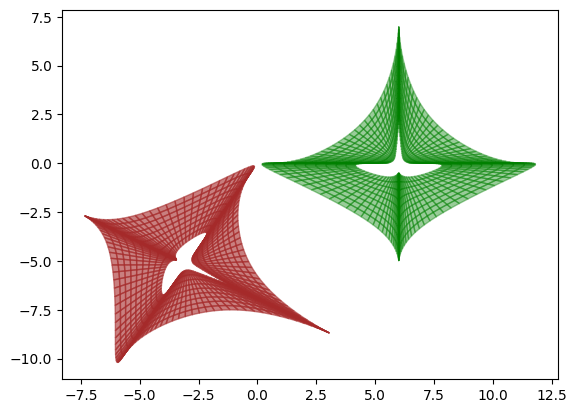

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u   = np.linspace(0,2*np.pi,150)
v   = np.linspace(1.5,6,10)
U,V = np.meshgrid(u,v)
r   = V + np.cos(3*np.sin(1.5*U))
X   = r * np.sin(U)**3 + 6
Y   = r * np.cos(U)**3
m,n = np.shape(X)
S1 = np.ones((3,m*n))
for row in range(m):
  S1[0:2,row*n:(row+1)*n] = [X[row,:],Y[row,:]]
theta = -120*np.pi/180
RM = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0, 0, 1]])
S2 = np.matmul(RM,S1)
X2, Y2 = np.zeros((m,n)), np.zeros((m,n))
for row in range(m):
  X2[row,:] = S2[0,row*n:(row+1)*n]
  Y2[row,:] = S2[1,row*n:(row+1)*n]
for row in range(m-1):
  for col in range(n-1):
    plt.fill([X[row,col],X[row+1,col],X[row+1,col+1],X[row,col+1]],
             [Y[row,col],Y[row+1,col],Y[row+1,col+1],Y[row,col+1]],
              color='green',alpha=.4)
    plt.fill([X2[row,col],X2[row+1,col],X2[row+1,col+1],X2[row,col+1]],
             [Y2[row,col],Y2[row+1,col],Y2[row+1,col+1],Y2[row,col+1]],
              color='brown',alpha=.6)

**Rotation of the surface (S1) by turning around the pivot point p_o=-0.5,1.5,1 and the rotation angle -60deg, obtaining the surface (S2).**

(-3.4668025109604907,
 1.186514405283833,
 -1.8576244911176212,
 1.8576244911176212)

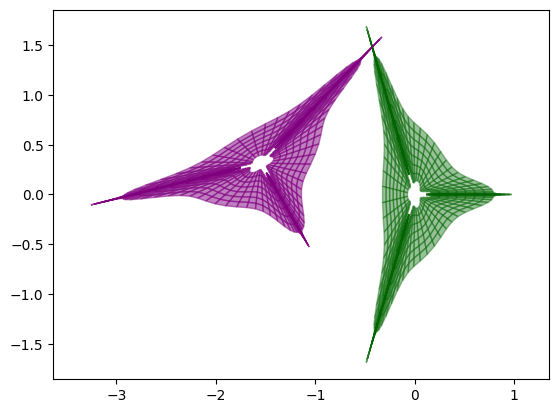

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u   = np.linspace(0,2*np.pi,100)
v   = np.linspace(0,1,8)
U,V = np.meshgrid(u,v)
r   = (10*V + 3*np.cos(np.sin(6*U)))/20
X   = (r * (2*np.cos(U) + np.cos(2*U)))/2
Y   = r * (2*np.sin(U) - np.sin(2*U))
m,n = np.shape(X)
S1 = np.ones((3,m*n))
for row in range(m):
  S1[0:2,row*n:(row+1)*n] = [X[row,:],Y[row,:]]
po = [-0.5,1.5,1]
TM = np.array([[1, 0, po[0]],
               [0, 1, po[1]],
               [0, 0, po[2]]])
theta = -60*np.pi/180
RM = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0, 0, 1]])
TTM = TM @ RM @ np.linalg.inv(TM)
S2  = TTM @ S1
X2, Y2 = np.zeros((m,n)), np.zeros((m,n))
for row in range(m):
  X2[row,:] = S2[0,row*n:(row+1)*n]
  Y2[row,:] = S2[1,row*n:(row+1)*n]
for row in range(m-1):
  for col in range(n-1):
    plt.fill([X[row,col],X[row+1,col],X[row+1,col+1],X[row,col+1]],
             [Y[row,col],Y[row+1,col],Y[row+1,col+1],Y[row,col+1]],
              color='darkgreen',alpha=.4)
    plt.fill([X2[row,col],X2[row+1,col],X2[row+1,col+1],X2[row,col+1]],
             [Y2[row,col],Y2[row+1,col],Y2[row+1,col+1],Y2[row,col+1]],
              color='purple',alpha=.5)

**Quick project**
First, we model the geometry of the arm as a simple surface (S1) composed of six points. The point located at the origin 0,0,1 will be jointed to a base, so it will rotate around this pivot point. The point located at 6,0,1 will be jointed to the forearm. The following code plot the arm surface (S1)

(-0.30000000000000004, 6.3, -1.1, 1.1)

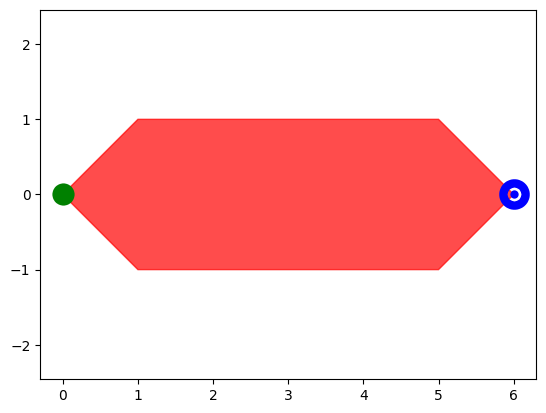

In [ ]:
import numpy as np, matplotlib.pyplot as plt
S1 = np.array([[0, 1, 5, 6, 5, 1],
              [0, 1, 1, 0,-1,-1],
              [1, 1, 1, 1, 1, 1]])
plt.fill(S1[0,:],S1[1,:],color='red',alpha=.7)
plt.scatter(S1[0,0],S1[1,0],marker='o',lw=10,color='green')
plt.scatter(S1[0,3],S1[1,3],marker='o',lw=16,color='blue')
plt.axis('equal')

Second, we model the geometry of the forearm as another simple surface (S2) composed of nine points. The point located at the origin 0,0,1 will be jointed to the arm. The following code plot the forearm surface (S2)

(-0.30000000000000004, 6.3, -1.1, 1.1)

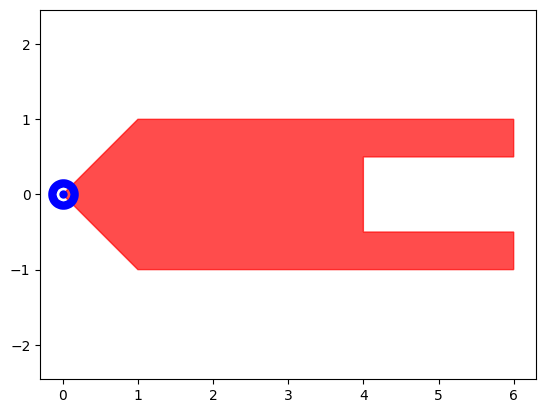

In [ ]:
import numpy as np, matplotlib.pyplot as plt
S2 = np.array([[0, 1, 6,  6,  4,  4,  6,  6, 1],
               [0, 1, 1, .5, .5,-.5,-.5, -1,-1],
               [1, 1, 1,  1,  1,  1,  1,  1, 1]])
plt.fill(S2[0,:],S2[1,:],color='red',alpha=.7)
plt.scatter(S2[0,0],S2[1,0],marker='o',lw=16,color='blue')
plt.axis('equal')

Third, we model the manipulator robot in two steps: **Step 1)** We model the robot arm by defining an orientation of \theta=60deg with respect to a horizontal line, therefore, we rotate the arm 60deg around its pivot point at the base0,0,1.
**Step 2)** We model the robot forearm, which is connected to the extreme of the arm, therefore, we shift the forearm to the jointed point with the arm; and then, we define an orientation of \theta=-10deg with respect to a horizontal line, therefore, we rotate the arm -10deg around its articulated point. The following code plots the manipulator robot

(-0.8384514087606694,
 9.55492070071641,
 -0.30036559990259554,
 6.307677597954505)

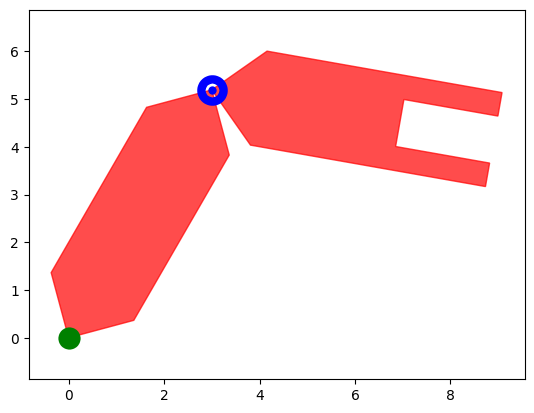

In [ ]:
import numpy as np, matplotlib.pyplot as plt
S1 = np.array([[0, 1, 5, 6, 5, 1],
              [0, 1, 1, 0,-1,-1],
              [1, 1, 1, 1, 1, 1]])
S2 = np.array([[0, 1, 6,  6,  4,  4,  6,  6, 1],
               [0, 1, 1, .5, .5,-.5,-.5, -1,-1],
               [1, 1, 1,  1,  1,  1,  1,  1, 1]])
theta = 60*np.pi/180
RM = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0, 0, 1]])
S1_robot  = RM @ S1
plt.fill(S1_robot[0,:],S1_robot[1,:],color='red',alpha=.7)
Dp = [S1_robot[0][3],S1_robot[1][3],S1[2][3]]
TM = np.array([[1, 0, Dp[0]],
               [0, 1, Dp[1]],
               [0, 0, Dp[2]]])
theta = -10*np.pi/180
RM = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0, 0, 1]])
S2_robot  = TM @ RM @ S2
plt.fill(S2_robot[0,:],S2_robot[1,:],color='red',alpha=.7)
plt.scatter(S1[0,0],S1[1,0],marker='o',lw=10,color='green')
plt.scatter(S2_robot[0,0],S2_robot[1,0],marker='o',lw=16,color='blue')
plt.axis('equal')